<a href="https://colab.research.google.com/github/tonyvo30/TensorFlow-Projects/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
#%pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#try:
  # %tensorflow_version only exists in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

#import tensorflow_docs as tfdocs
#import tensorflow_docs.plots
#import tensorflow_docs.modeling

In [3]:
# Import data
#!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv',skipinitialspace=True)
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [4]:
# Encoding categorical data
dataset['sex'] = dataset['sex'].map({"female": 0, "male": 1})
dataset['smoker'] = dataset['smoker'].map({'no': 0, 'yes': 1})
dataset['region'] = dataset['region'].map({'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3})
#dataset = pd.get_dummies(dataset, columns=['sex'], prefix='', prefix_sep='')
dataset.tail()


,age,sex,bmi,children,smoker,region,expenses
1333,50,1,31.0,3,0,0,10600.55
1334,18,0,31.9,0,0,1,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95
1337,61,0,29.1,0,1,0,29141.36


In [5]:
# Splitting dataset into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [6]:
# Getting label (expenses)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('expenses')
test_labels = test_features.pop('expenses')

In [7]:
# Normalization
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[39.036446    0.49813083 30.737288    1.093458    0.19906542  1.5149533 ]]


In [23]:
# Build Model 1
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                metrics=['mae','mse'],
                optimizer=tf.keras.optimizers.legacy.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense_3 (Dense)             (None, 64)                448       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4686 (18.31 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [33]:
# Build Model 2
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                metrics=['mae','mse'],
                optimizer=tf.keras.optimizers.legacy.Adam(0.001))
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17550 (68.56 KB)
Trainable params: 17537 (68.50 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [34]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=400)

CPU times: total: 25.6 s
Wall time: 19.4 s


In [35]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,12711.566406,12711.566406,301863456.0,14425.119141,14425.119141,363229248.0,0
1,12704.811523,12704.811523,301686656.0,14414.436523,14414.436523,362919264.0,1
2,12688.465820,12688.465820,301262496.0,14390.280273,14390.280273,362237568.0,2
3,12654.310547,12654.310547,300425664.0,14343.554688,14343.554688,360938080.0,3
4,12592.501953,12592.501953,298897152.0,14263.934570,14263.934570,358757120.0,4


In [36]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
395,1444.579102,1444.579102,19249252.0,1429.429077,1429.429077,19115510.0,395
396,1443.371948,1443.371948,19251466.0,1437.114868,1437.114868,19026310.0,396
397,1440.698853,1440.698853,19258190.0,1436.792358,1436.792358,18997920.0,397
398,1444.084961,1444.084961,19233246.0,1435.059326,1435.059326,19097934.0,398
399,1443.794922,1443.794922,19264478.0,1428.735840,1428.735840,19098566.0,399


In [40]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([1300, 14500])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Expenses]')
  plt.legend()
  plt.grid(True)

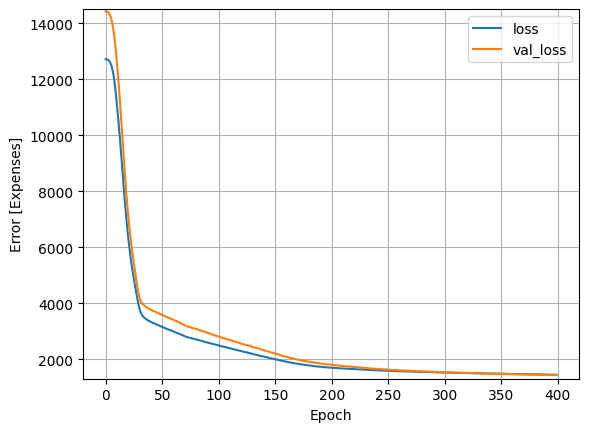

In [41]:
plot_loss(history)

In [42]:
test_results = dnn_model.evaluate(test_features, test_labels, verbose=0)
test_results

[2139.3359375, 2139.3359375, 32094326.0]

9/9 - 0s - loss: 2139.3359 - mae: 2139.3359 - mse: 32094326.0000 - 23ms/epoch - 3ms/step
Testing set Mean Abs Error: 2139.34 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 845us/step


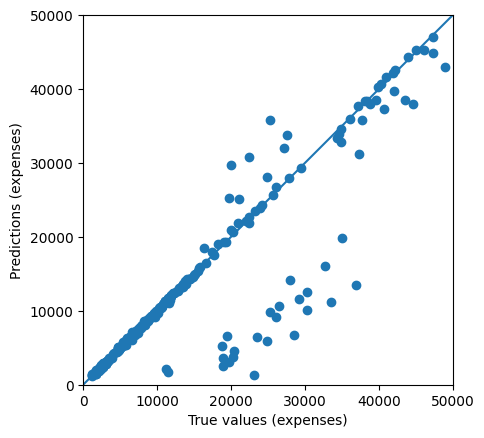

In [43]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = dnn_model.evaluate(test_features, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
